## Autonomous drone to identify different species

- We want to make an autonomous drone which is going to identify three different species of iris.
- It is going to measure the length and width of the sepals and petals.
- Use the the features from Iris dataset to design a simple unsupervised  machine learning model.
- This means the data will not have labels/targets. So model must discover patterns in the data
- We know the data comes from 3 different species though



In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Prepare the data

In [3]:
data = load_iris() #shift+tab

In [4]:
df = pd.DataFrame()
df['sepal length'] = data['data'][:,0]
df['sepal width'] = data['data'][:,1]
df['petal length'] = data['data'][:,2]
df['petal width'] = data['data'][:,3]

Only selecting the first 3 features instead of all 4

In [5]:
selected_features = ['sepal length', 'sepal width', 'petal length'] #only selecting the first 3 features
df = df[selected_features]
X = df.to_numpy() # These are our features

In [6]:
display(df)

,sepal length,sepal width,petal length
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4
...,...,...,...
145,6.7,3.0,5.2
146,6.3,2.5,5.0
147,6.5,3.0,5.2
148,6.2,3.4,5.4


In [7]:
X = df.to_numpy() # These are our features

In [8]:
df['target'] = data['target']

In [9]:
named_targets = []

for elm in df['target'].to_list():
    named_targets.append(data.target_names[elm])


In [10]:
df['species_name'] = named_targets

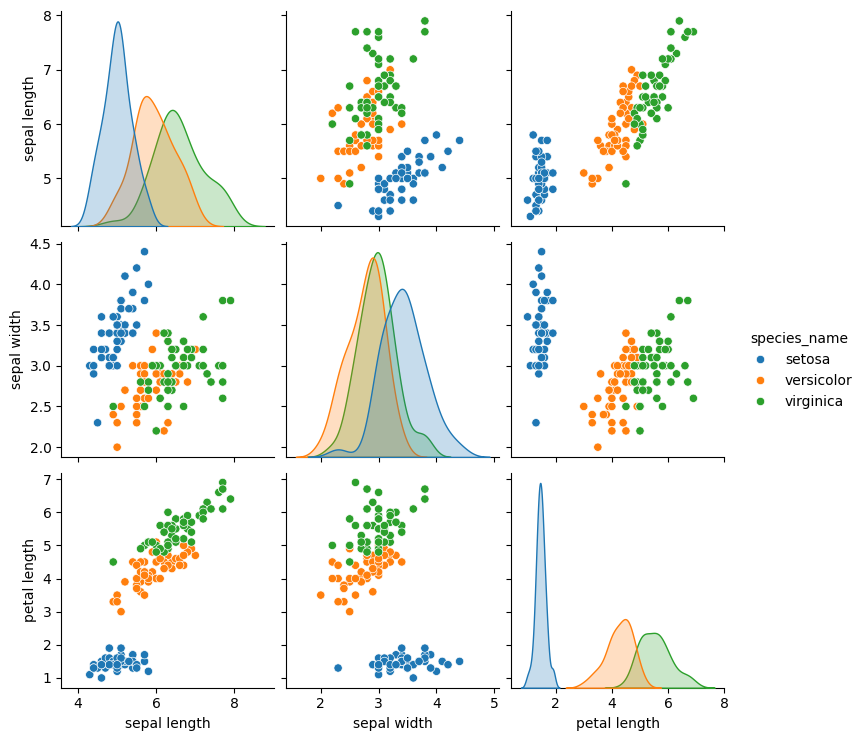

In [11]:
# sns.pairplot(df, hue='target')
sns.pairplot(df.drop(labels=['target'],axis=1), hue='species_name')

**3D scatter plot**



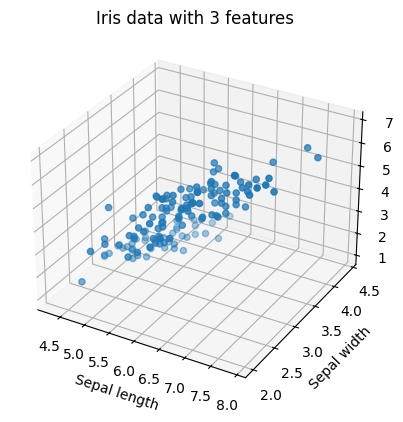

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

x = df['sepal length'].to_list()
y = df['sepal width'].to_list()
z = df['petal length'].to_list()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length') #where are you
ax.set_title('Iris data with 3 features')
ax.scatter(x, y, z)

plt.show()

# y will not be used because we are doing unsupervised learning

### ideally we should only split X because the data is supposed to be not labeled

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test =train_test_split(
    X,
    test_size=0.30,
    train_size=0.70,
    random_state=123,
    shuffle=True)

In [15]:
print('X_train shape :', X_train.shape)
print('X_test shape :', X_test.shape)

X_train shape : (105, 3)
X_test shape : (45, 3)


### However, since we have labeled iris data we are going to split both X and y and just keep the y seperate. Also split indices to keep track of training and testing data

In [16]:
y = df['target'].to_numpy()

In [17]:
X_train, X_test, y_train, y_test, idx_train, idx_test=train_test_split(
    X,y, range(X.shape[0]),
    test_size=0.30,
    train_size=0.70,
    random_state=123,
    shuffle=True,
    stratify=y)

In [18]:
print('X_train shape :', X_train.shape)
print('X_test shape :', X_test.shape)
print('y_train shape :', y_train.shape)
print('y_test shape :', y_test.shape)

X_train shape : (105, 3)
X_test shape : (45, 3)
y_train shape : (105,)
y_test shape : (45,)


['train', 'train', 'test', 'train', 'train', 'train', 'train', 'train', 'train', 'test', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'test', 'train', 'test', 'train', 'train', 'test', 'train', 'train', 'test', 'train', 'train', 'test', 'train', 'train', 'train', 'test', 'test', 'test', 'train', 'train', 'test', 'test', 'test', 'train', 'train', 'test', 'train', 'train', 'test', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'test', 'test', 'train', 'train', 'train', 'test', 'train', 'test', 'test', 'test', 'test', 'train', 'test', 'train', 'train', 'train', 'test', 'train', 'train', 'train', 'test', 'test', 'train', 'train', 'test', 'train', 'train', 'train', 'train', 'train', 'test', 'train', 'train', 'train', 'train', 'test', 'train', 'test', 'train', 'train', 'train', 'train', 'train', 'train', 'test', 'test', 'train', 'train', 'train', 'test', 'train', 'train', 'train', 'train', 'test', 'train', 'train', 'train', 'train'

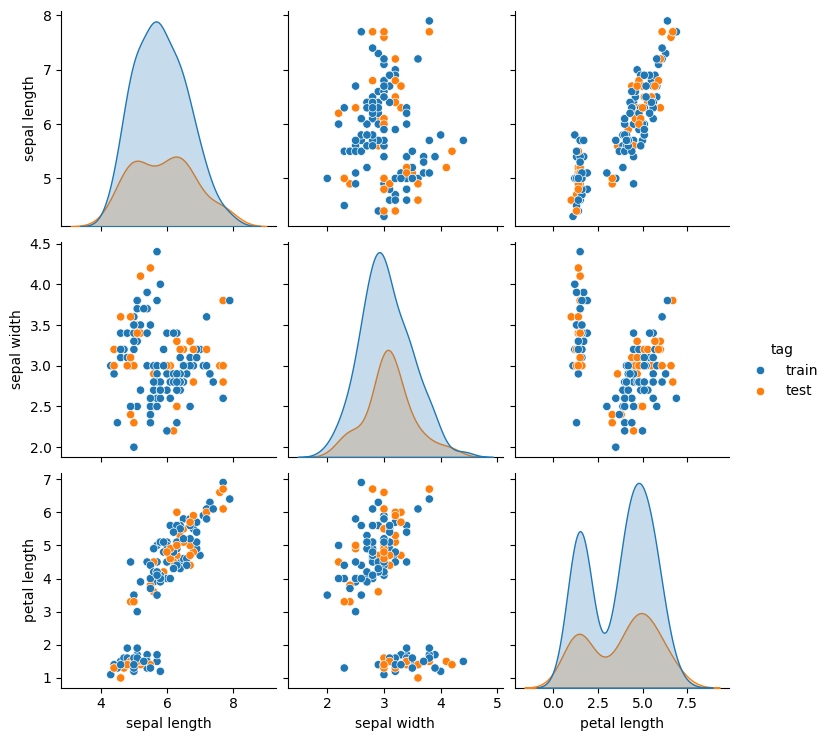

In [19]:
# tag points with train or test labels

tag = []

for _ in range(X.shape[0]):
    if _ in idx_train:
        tag.append('train')
    else:
        tag.append('test')

print(tag)
df['tag'] = tag

sns.pairplot(df.drop(labels=['target'],axis=1), hue='tag') #modified

 since we used a good mix of points from everywhere selection bias is minimal.

## data preparation is complete (on to algorithms)

In [20]:

class KMeans:
    def __init__(self, k):
        self.k = k
        self.cluster_labels = None
    def fit(self, X):
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False), :]
        self.cluster_labels = np.arange(self.k)
        while True:
            distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
            self.clusters = np.argmin(distances, axis=0)
            new_centroids = np.array([X[self.clusters == i, :].mean(axis=0) for i in range(self.k)])
            # check convergence
            if np.array_equal(new_centroids, self.centroids):
                break
            else:
                self.centroids = new_centroids

    def predict(self, X):
        distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
        return self.cluster_labels[np.argmin(distances, axis=0)]

In [21]:
model = KMeans(k=3)
model.fit(X_train)
kmeans_labels = model.predict(X_test)
cluster_coords = model.centroids
print('predicted_labels:', kmeans_labels)
print('cluster centroids:', cluster_coords)

predicted_labels: [2 1 2 1 1 0 0 2 0 0 1 0 1 0 2 0 2 2 0 0 0 0 0 2 0 2 1 0 1 1 1 1 2 2 2 2 2
 1 1 0 1 2 2 1 2]
cluster centroids: [[5.04285714 3.43428571 1.48857143]
 [6.77857143 3.02857143 5.62142857]
 [5.82619048 2.72142857 4.35238095]]


### since we have labeled data we may be tempted to compare them our data but it will not make sense. Because the integer labels of kmeans are not the same as the class labels given to the iris data.

In [22]:
y_train

array([1, 0, 1, 2, 0, 2, 0, 2, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       2, 1, 0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 0,
       0, 2, 1, 0, 1, 2, 0, 2, 0, 0, 1, 1, 1, 2, 1, 2, 2, 0, 0, 2, 2, 2,
       0, 2, 0, 1, 1, 2, 2, 0, 0, 0, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 0, 0,
       1, 1, 2, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1, 0, 0, 0, 2])

In [23]:
df['kmeans_labels'] = model.predict(X)

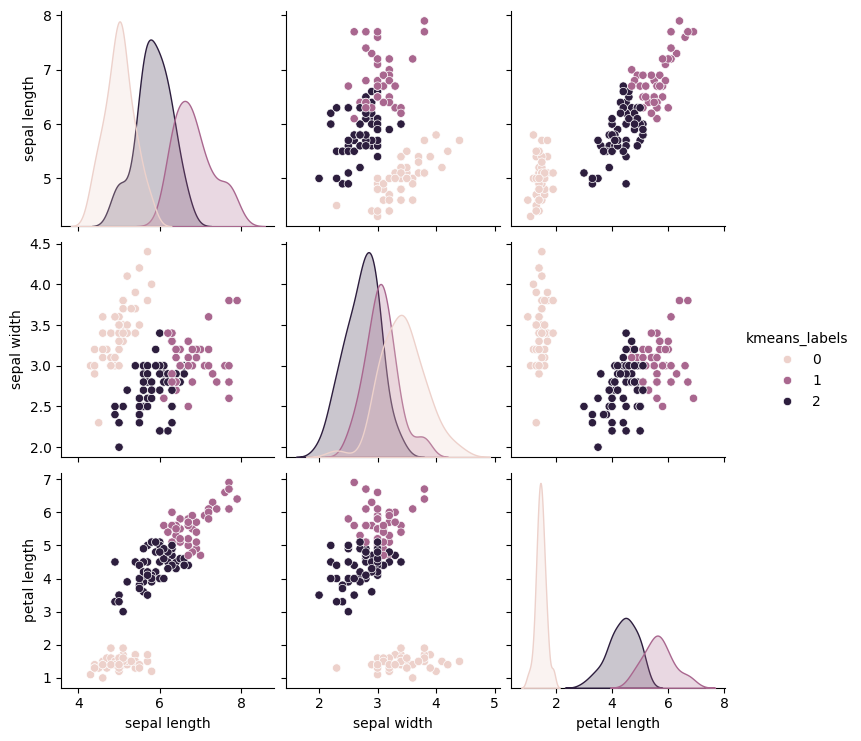

In [24]:
sns.pairplot(df.drop(labels=['target'],axis=1), hue='kmeans_labels')

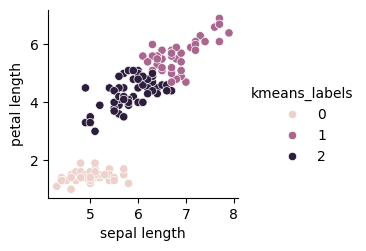

In [25]:
# too many plots so let's trim them down

sns.pairplot(df.drop(labels=['target'],axis=1), x_vars=['sepal length'],
    y_vars=['petal length'], hue='kmeans_labels')

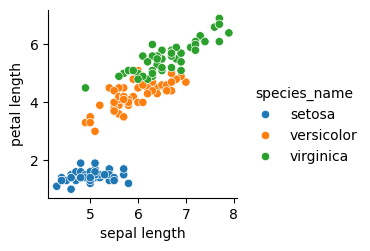

In [27]:
sns.pairplot(df.drop(labels=['target'],axis=1), x_vars=['sepal length'],
    y_vars=['petal length'], hue='species_name')


In [28]:
df.columns

Index(['sepal length', 'sepal width', 'petal length', 'target', 'species_name',
       'tag', 'kmeans_labels'],
      dtype='object')

### locate the cluster centers

Text(0, 0.5, 'petal length')

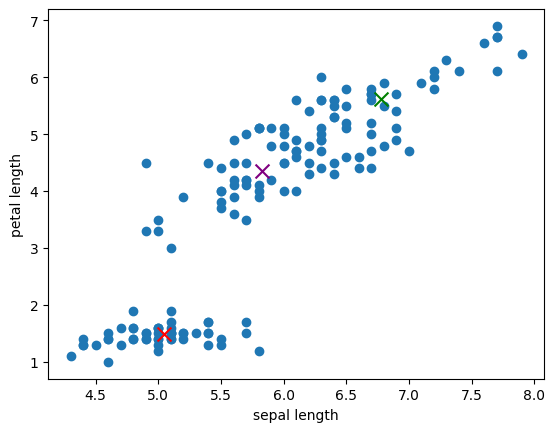

In [29]:
plt.scatter(df['sepal length'].to_list(), df['petal length'].to_list())
plt.scatter(cluster_coords[0][0], cluster_coords[0][2], color='red', marker='x', s=100)
plt.scatter(cluster_coords[1][0], cluster_coords[1][2], color='green', marker='x', s=100)
plt.scatter(cluster_coords[2][0], cluster_coords[2][2], color='purple', marker='x', s=100)
plt.xlabel('sepal length')
plt.ylabel('petal length')

Since the data is 4 dimensional for true visualization we need to create pairplots of the 4 features and plot centers in every dimension to get a true idea of the centers. Try this as homework.

### let's see how sklearn do

In [30]:
from sklearn.cluster import KMeans
skmodel = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init='auto',
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='lloyd',
)

skmodel.fit(X_train)

KMeans(n_clusters=3)

In [31]:
skmodel.labels_ # training labels

array([0, 1, 0, 2, 1, 0, 1, 2, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1,
       2, 0, 1, 0, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 1,
       1, 2, 0, 1, 2, 2, 1, 2, 1, 1, 0, 0, 0, 2, 0, 2, 0, 1, 1, 2, 2, 0,
       1, 0, 1, 0, 0, 2, 2, 1, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 1, 1,
       0, 0, 2, 0, 1, 1, 0, 0, 0, 2, 0, 1, 0, 1, 1, 1, 2], dtype=int32)

In [32]:
skmodel.predict(X_test) # predict labels, remember the integers do not make same sense in training and testing for clustering

array([0, 2, 0, 2, 2, 1, 1, 0, 1, 1, 2, 1, 2, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 2, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 2,
       0], dtype=int32)

In [33]:
skmodel_labels = skmodel.predict(X)

In [34]:
df['skmodel_labels'] = skmodel_labels

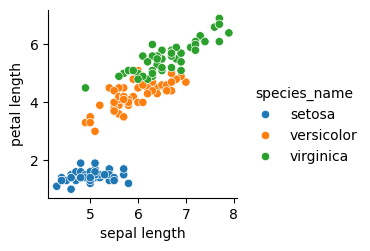

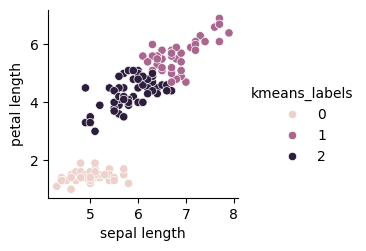

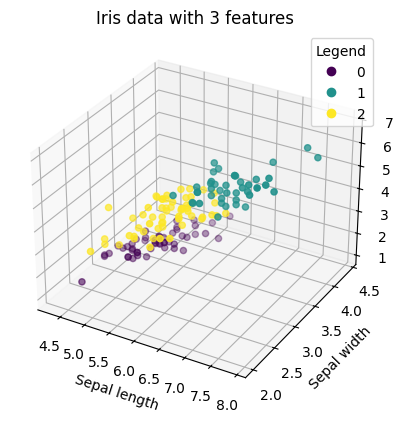

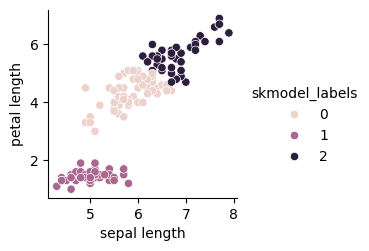

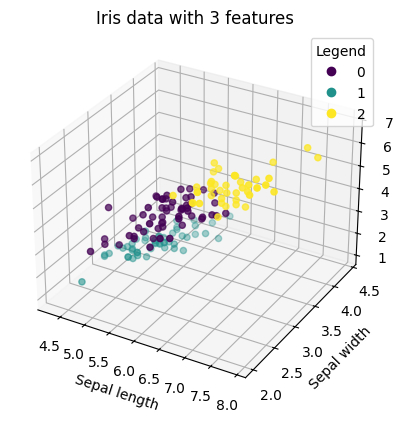

In [44]:
sns.pairplot(df.drop(labels=['target'],axis=1), x_vars=['sepal length'],
    y_vars=['petal length'], hue='species_name')
# too many plots so let's trim them down



sns.pairplot(df.drop(labels=['target'],axis=1), x_vars=['sepal length'],
    y_vars=['petal length'], hue='kmeans_labels')


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length') #where are you
ax.set_title('Iris data with 3 features')
scatter = ax.scatter(x, y, z, c=df['kmeans_labels'].to_list())



# Get legend handles and labels using legend_elements()
handles, labels = scatter.legend_elements()

# Create the legend
ax.legend(handles, labels, title="Legend")

plt.show()

sns.pairplot(df.drop(labels=['target'],axis=1), x_vars=['sepal length'],
    y_vars=['petal length'], hue='skmodel_labels')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length') #where are you
ax.set_title('Iris data with 3 features')
scatter = ax.scatter(x, y, z, c=df['skmodel_labels'].to_list())



# Get legend handles and labels using legend_elements()
handles, labels = scatter.legend_elements()

# Create the legend
ax.legend(handles, labels, title="Legend")

plt.show()

In [36]:
# Elbow plot for choosing k if you do not know it

Text(0, 0.5, 'Distortion or Inertia: \nSum of squared distances\n of samples to their closest\n cluster center')

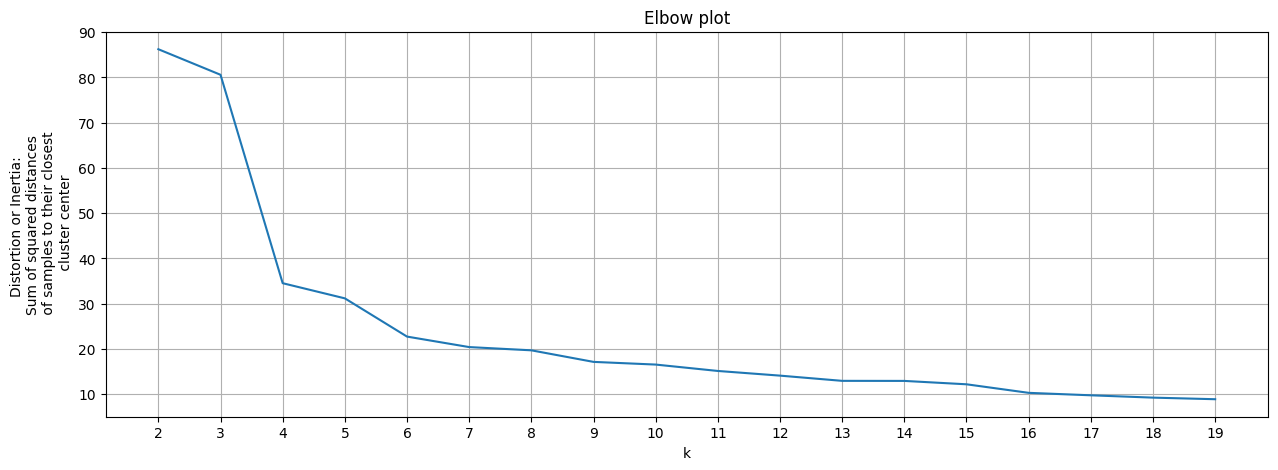

In [37]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt


distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k,init='k-means++',
    n_init='auto',)
    kmeans.fit(X_train)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.xticks(ticks = range(2, 20))
plt.title('Elbow plot')
plt.xlabel('k')
plt.ylabel('Distortion or Inertia: \nSum of squared distances\n of samples to their closest\n cluster center')

Text(0, 0.5, 'silhouette scores')

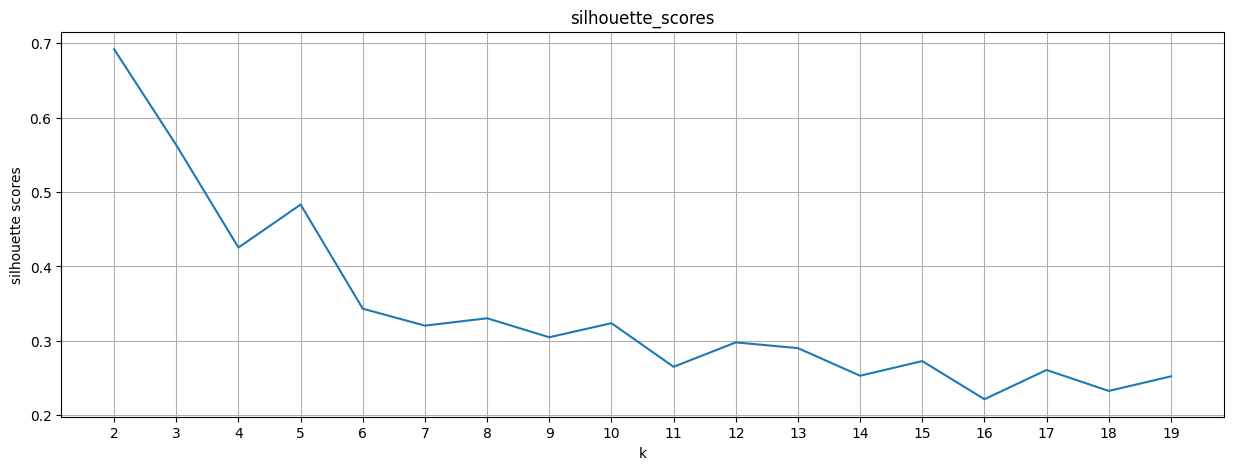

In [38]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k,init='k-means++',
    n_init='auto',)
    kmeans.fit(X_train)
    silhouette_scores.append(silhouette_score(X_train, kmeans.labels_))

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), silhouette_scores)
plt.grid(True)
plt.xticks(ticks = range(2, 20))
plt.title('silhouette_scores')
plt.xlabel('k')
plt.ylabel('silhouette scores')

# **As can be seen by the graphs, adding more clusters decreases the inertia and silhouette score**